In [1]:
import bnlearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import causaldag as cd
import MICODAGCD
import gnies

In [2]:
# # data = bnlearn.bnlearn.import_example('sachs',,verbose=0)
# int_data = pd.read_table('../Data/RealData/sachs.interventional.txt', sep=' ')
# obs_data = pd.read_table('../Data/RealData/sachs.data.txt')
# network = bnlearn.bnlearn.import_DAG("sachs", verbose=False)
# nodes = ['Raf', 'Mek', 'Plcg', 'PIP2', 'PIP3', 'Erk', 'Akt', 'PKA', 'PKC', 'P38',
#        'Jnk']
# network['adjmat'].loc[nodes, nodes] + 0
# p = 11
# int_data.loc[(int_data.INT == 8), int_data.columns!='INT'].cov()
# # split the interventional dataset as different environments
# intervention_targets = int_data.INT.unique()
# datas = [int_data.loc[(int_data.INT == e), int_data.columns!='INT'] for e in intervention_targets]
# # datas = [obs_data[nodes]]
# # print(int_data.loc[(int_data.INT == intervention_targets[0])].cov())
# # print(e)
# ns = [len(df) for df in datas]
# print(ns)
# one = np.ones((p, p))
# one = one - np.diag(np.diag(one))
# # one = (abs(obs_data.cov()) > 100) + 0
# # one = one.values
# estimated_gamma, estimated_delta, min_obj = MICODAGCD_copy.solve_int(datas, one, 0.05, MAX_cycles=100)
# estimated_B = np.array(
#     [[1 if estimated_gamma[i, j] != 0 and i != j else 0 for j in range(p)] for i in range(p)])
# true_B = network['adjmat'].loc[nodes, nodes] + 0
# true_B = true_B.values
# #
# #
# # # create a dag for computing shd for cpdag
# true_dag = cd.DAG.from_amat(np.array(true_B))
# true_cpdag = true_dag.cpdag().to_amat()
# estimated_dag = cd.DAG.from_amat(np.array(estimated_B))
# estimated_cpdag = estimated_dag.cpdag().to_amat()
# SHD_cpdag = np.sum(np.abs(estimated_cpdag[0] - true_cpdag[0]))
# print(SHD_cpdag)
# print(estimated_B)
# print(estimated_B.sum())
# print(true_B)
# print(true_B.sum())
# print(np.logical_and(true_B==1, estimated_B.T==1).sum())
# print(np.logical_and(true_B==0, estimated_B==1).sum())

See if the data from Juan's repo can be used.

In [3]:
# read the normalized data
p = 11
node_names = ["Raf", "Mek", "Erk", "Plcg", "PIP2", "PIP3", "PKC", "Akt", "PKA", "Jnk", "P38"]
obs_data = pd.read_table('../Data/RealData/sachs.data.txt')
obs_data = obs_data[node_names].values
obs_data = (obs_data - obs_data.mean(axis=0))/obs_data.std(axis=0)

path = '../Data/RealData/raw/'
true_targets = list(np.load(path + 'graph.npy', allow_pickle=False))  # true intervetion targets for each dataset
print(true_targets[0])
npz_file = np.load(path + 'test_case_.npz', allow_pickle=False)  # datasets
print(npz_file['arr_0'].shape)
datas = [npz_file[f'arr_{i}'] for i in range(9)]
datas = [np.bmat([[datas[0]],[datas[1]]])] + datas[2:]
# datas = [obs_data] + [npz_file[f'arr_{i}'] for i in range(9)]
ns = [len(df) for df in datas]  # number of samples in each dataset
pkl_file = np.load(path + 'test_cases.pickle', allow_pickle=True)  # real graph
print(pkl_file['graph'])

[0 1 0 0 0 0 0 0 0 0 0]
(853, 11)
[[0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 1 1 0 0 1 0 0 0]
 [1 1 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 1 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]


In [4]:
sum(ns[1:])

5711

In [5]:
np.quantile(abs(np.cov(np.vstack(datas).T)), 0.05)

0.017137188331801625

In [6]:

one = np.ones((11,11))
# one = one - np.eye(11)

In [7]:
estimated_gamma, estimated_delta, min_obj, objs = MICODAGCD.solve(datas,1e-5)

# 1e-6

In [8]:
estimated_B = np.array(
    [[1 if estimated_gamma[i, j] != 0 and i != j else 0 for j in range(p)] for i in range(p)])
# true_B = network['adjmat'].loc[nodes, nodes] + 0
# true_B = true_B.values
true_B = pkl_file['graph']
#
#
# # create a dag for computing shd for cpdag
true_dag = cd.DAG.from_amat(np.array(true_B))
true_cpdag = true_dag.cpdag().to_amat()
estimated_dag = cd.DAG.from_amat(np.array(estimated_B))
estimated_cpdag = estimated_dag.cpdag().to_amat()
SHD_cpdag = np.sum(np.abs(estimated_cpdag[0] - true_cpdag[0]))
print(SHD_cpdag)
print(estimated_B.sum(), true_B.sum())

60
53 18


In [9]:
print(np.logical_and(true_B==1, estimated_B==1).sum()/true_B.sum())
print(np.logical_and(true_B==0, estimated_B==1).sum()/estimated_B.sum())

0.5
0.8301886792452831


In [190]:
[8e-1*0.5**i for i in range(1, 12)]

[0.4,
 0.2,
 0.1,
 0.05,
 0.025,
 0.0125,
 0.00625,
 0.003125,
 0.0015625,
 0.00078125,
 0.000390625]

In [13]:
print(np.logical_and(true_B+true_B.T==1, estimated_B+estimated_B.T==1).sum()/true_B.sum()/2)

1.0


stop at the 24-th iteration.


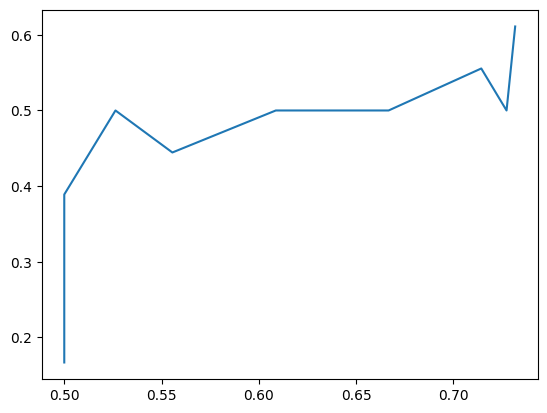

In [101]:
lambdas = [0.8*0.6**i for i in range(1, 13)]
# lambdas = [0.4, 0.2, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005,0.0001]
estimated_Bs = MICODAGCD.solve_auto(datas, lambdas)
tprs = []
fprs = []
for estimated_gamma in estimated_Bs:
    estimated_B = np.array(
    [[1 if estimated_gamma[i, j] != 0 and i != j else 0 for j in range(p)] for i in range(p)])
    tprs.append(np.logical_and(true_B==1, estimated_B==1).sum()/true_B.sum())
    fprs.append(np.logical_and(true_B==0, estimated_B==1).sum()/estimated_B.sum())
tpr_fpr = list(zip(tprs, fprs))
tpr_fpr.sort(key=lambda x: x[1])
tprs, fprs = zip(*tpr_fpr)
raw_tprs, raw_fprs = np.array(list(tprs)), np.array(list(fprs))
plt.plot(raw_fprs, raw_tprs)

# GnIES

In [99]:
lambdas = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10]
tprs_gnies, fprs_gnies = [], []
for l in lambdas:
    _score, icpdag, I = gnies.fit(datas, approach='rank', lmbda=l)
    tprs_gnies.append(np.logical_and(true_B==1, icpdag==1).sum()/true_B.sum())
    fprs_gnies.append(np.logical_and(true_B==0, icpdag==1).sum()/icpdag.sum())

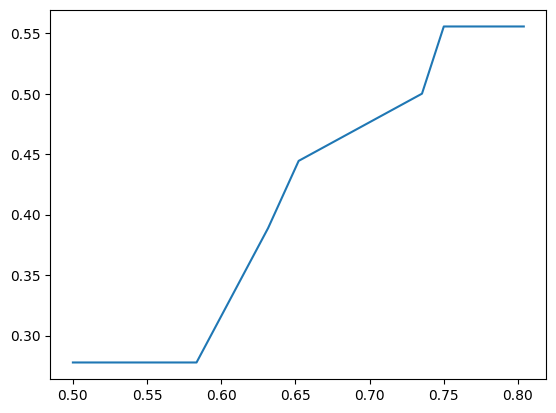

In [100]:
tpr_fpr_gnies = list(zip(tprs_gnies, fprs_gnies))
tpr_fpr_gnies.sort(key=lambda x: x[1])
raw_tprs_gnies, raw_fprs_gnies = zip(*tpr_fpr_gnies)
plt.plot(raw_fprs_gnies, raw_tprs_gnies)

In [103]:
np.savez('../Results/realdata/raw_data_results.npz', micodag_tpr=raw_tprs, micodag_fpr=raw_fprs, gnies_tpr=raw_tprs_gnies, gnies_fpr=raw_fprs_gnies)

In [104]:
# test_load = np.load('../Results/realdata/raw_data_results.npz')

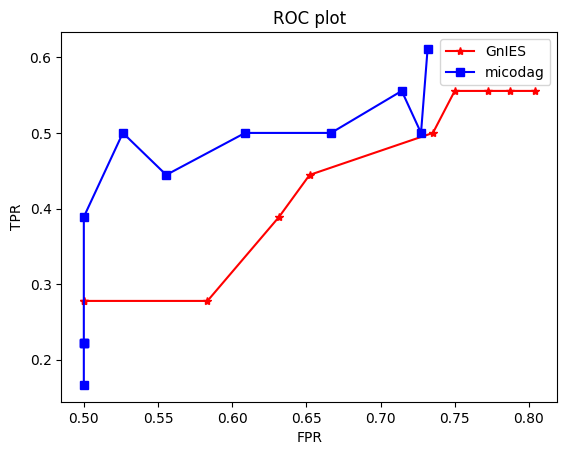

In [102]:

plt.plot(raw_fprs_gnies, raw_tprs_gnies, 'r-*')
plt.plot(raw_fprs, raw_tprs, 'b-s')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC plot')
plt.legend(['GnIES','micodag'])
plt.show()

# micodag Hybrid

0.004837294079999999

In [91]:
all_tprs, all_fprs = [], []
lambdas = [0.8*0.6**i for i in range(1, 14)]
for ii in range(10):
    hybrid_npz_file = np.load('../Data/RealData/hybrid/' + f'test_case_{ii}.npz', allow_pickle=False)
    hybrid_datas = [hybrid_npz_file[f'arr_{i}'] for i in range(9)]
    hybrid_datas = [np.bmat([[hybrid_datas[0]],[hybrid_datas[1]]])] + hybrid_datas[2:]
    # pkl_file = np.load('../Data/RealData/hybrid/' + 'test_cases.pickle', allow_pickle=True)
    
    estimated_Bs = MICODAGCD.solve_auto(hybrid_datas, lambdas)
    tprs = []
    fprs = []
    for estimated_gamma in estimated_Bs:
        estimated_B = np.array(
        [[1 if estimated_gamma[i, j] != 0 and i != j else 0 for j in range(p)] for i in range(p)])
        tprs.append(np.logical_and(true_B==1, estimated_B==1).sum()/true_B.sum())
        fprs.append(np.logical_and(true_B==0, estimated_B==1).sum()/estimated_B.sum())
    tpr_fpr = list(zip(tprs[4:], fprs[4:]))
    tpr_fpr.sort(key=lambda x: x[1])
    tprs, fprs = zip(*tpr_fpr)
    tprs, fprs = np.array(list(tprs)), np.array(list(fprs))
    all_tprs.append(tprs)
    all_fprs.append(fprs)
# plt.plot(fprs, tprs)

stop at the 43-th iteration.
stop at the 17-th iteration.
stop at the 31-th iteration.
stop at the 49-th iteration.
stop at the 33-th iteration.
stop at the 42-th iteration.
stop at the 34-th iteration.
stop at the 48-th iteration.
stop at the 48-th iteration.
stop at the 10-th iteration.
stop at the 17-th iteration.
stop at the 15-th iteration.
stop at the 22-th iteration.
stop at the 41-th iteration.
stop at the 13-th iteration.
stop at the 50-th iteration.
stop at the 10-th iteration.
stop at the 52-th iteration.
stop at the 21-th iteration.
stop at the 59-th iteration.
stop at the 51-th iteration.
stop at the 39-th iteration.
stop at the 18-th iteration.
stop at the 23-th iteration.
stop at the 47-th iteration.
stop at the 45-th iteration.
stop at the 48-th iteration.
stop at the 14-th iteration.
stop at the 57-th iteration.
stop at the 30-th iteration.
stop at the 20-th iteration.
stop at the 62-th iteration.
stop at the 29-th iteration.
stop at the 43-th iteration.
stop at the 50

In [92]:
np.nanmean(all_tprs, axis=0)

array([0.41666667, 0.47222222, 0.52777778, 0.57777778, 0.61111111,
       0.62777778, 0.63333333, 0.66111111, 0.67777778])

In [93]:
np.nanmean(all_fprs, axis=0)

array([0.39668165, 0.45084019, 0.51352646, 0.59224842, 0.63791273,
       0.6521206 , 0.66841746, 0.68841166, 0.70293763])

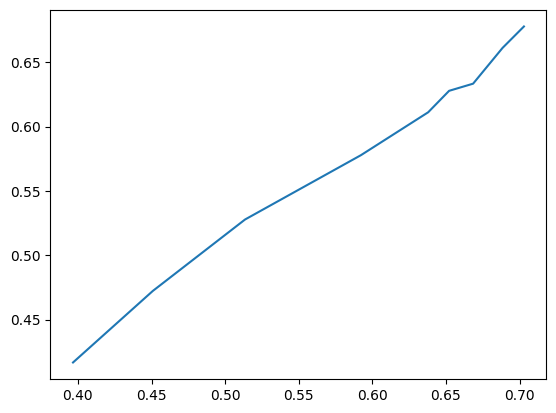

In [94]:
plt.plot(np.nanmean(all_fprs, axis=0), np.nanmean(all_tprs, axis=0))

# GnIES hybrid

In [87]:
all_tprs_gnies, all_fprs_gnies = [], []
lambdas = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2]
for ii in range(10):
    print(f"dataset {ii}")
    hybrid_npz_file = np.load('../Data/RealData/hybrid/' + f'test_case_{ii}.npz', allow_pickle=False)
    hybrid_datas = [hybrid_npz_file[f'arr_{i}'] for i in range(9)]
    # hybrid_datas = [np.bmat([[hybrid_datas[0]],[hybrid_datas[1]]])] + hybrid_datas[2:]
    # pkl_file = np.load('../Data/RealData/hybrid/' + 'test_cases.pickle', allow_pickle=True)
    
    tprs_gnies, fprs_gnies = [], []
    for l in lambdas:
        _score, icpdag, I = gnies.fit(hybrid_datas, approach='rank', lmbda=l)
        tprs_gnies.append(np.logical_and(true_B==1, icpdag==1).sum()/true_B.sum())
        fprs_gnies.append(np.logical_and(true_B==0, icpdag==1).sum()/icpdag.sum())

    tpr_fpr = list(zip(tprs_gnies, fprs_gnies))
    tpr_fpr.sort(key=lambda x: x[1])
    tprs, fprs = zip(*tpr_fpr)
    tprs, fprs = np.array(list(tprs)), np.array(list(fprs))
    all_tprs_gnies.append(tprs)
    all_fprs_gnies.append(fprs)

dataset 0
dataset 1
dataset 2
dataset 3
dataset 4
dataset 5
dataset 6
dataset 7
dataset 8
dataset 9


In [98]:
np.savez('../Results/realdata/semi-synthetic_results.npz', micodag_tpr=all_tprs, micodag_fpr=all_fprs, gnies_tpr=all_tprs_gnies, gnies_fpr=all_fprs_gnies)

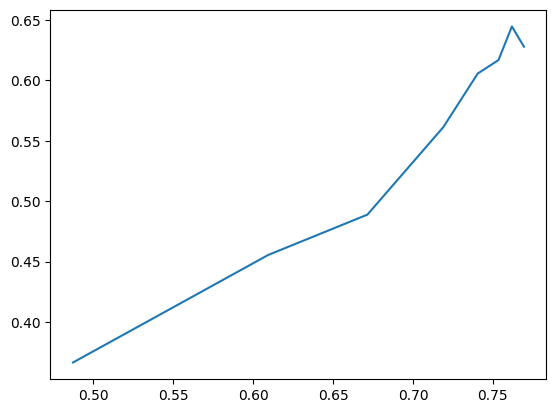

In [88]:
plt.plot(np.nanmean(all_fprs_gnies, axis=0), np.nanmean(all_tprs_gnies, axis=0))

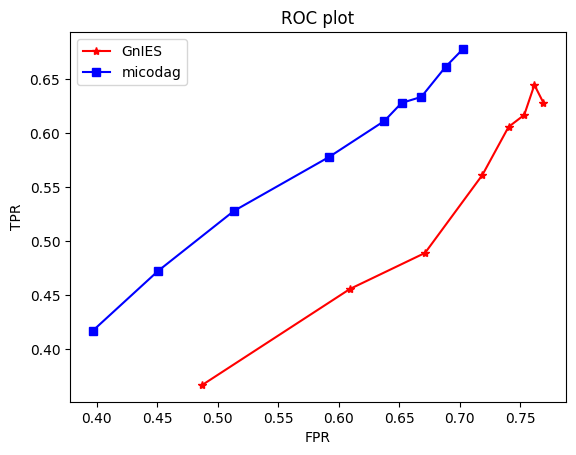

In [95]:
ticks = [0, 0.2, 0.4, 0.6, 0.8, 1]
# ax.set_xlim([0,1])
# ax.set_ylim([0,1])
# ax.set_xlabel('FDP')
# ax.set_ylabel('TDP')
# ax.set_yticks(ticks)
# ax.set_xticks(ticks)
# ax.set_xticklabels(ticks)
# ax.set_yticklabels(ticks)
plt.plot(np.nanmean(all_fprs_gnies, axis=0), np.nanmean(all_tprs_gnies, axis=0), 'r-*')
plt.plot(np.nanmean(all_fprs, axis=0), np.nanmean(all_tprs, axis=0), 'b-s')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC plot')
plt.legend(['GnIES','micodag'])
plt.show()

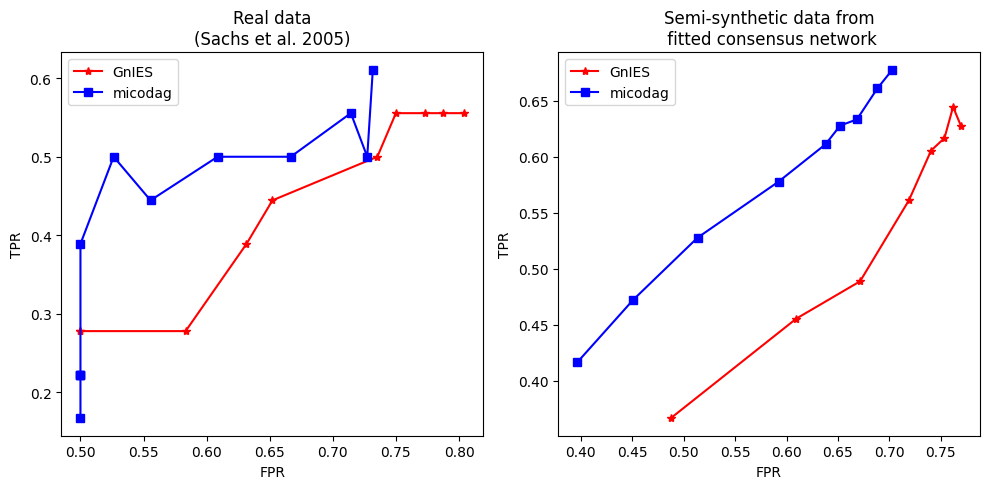

In [118]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# First subplot
axs[0].plot(raw_fprs_gnies, raw_tprs_gnies, 'r-*', label='GnIES')
axs[0].plot(raw_fprs, raw_tprs, 'b-s', label='micodag')
axs[0].set_title("Real data\n(Sachs et al. 2005)")
# axs[0].set_xlim([0,1])
# axs[0].set_ylim([0,1])
axs[0].set_xlabel('FPR')
axs[0].set_ylabel('TPR')
axs[0].legend()

# Second subplot
axs[1].plot(np.nanmean(all_fprs_gnies, axis=0), np.nanmean(all_tprs_gnies, axis=0), 'r-*', label='GnIES')
axs[1].plot(np.nanmean(all_fprs, axis=0), np.nanmean(all_tprs, axis=0), 'b-s', label='micodag')
axs[1].set_title('Semi-synthetic data from\n fitted consensus network')
# axs[1].set_xlim([0,1])
# axs[1].set_ylim([0,1])
axs[1].set_xlabel('FPR')
axs[1].set_ylabel('TPR')
axs[1].legend()

# Adjust layout and show the plot
plt.tight_layout()  # Automatically adjust subplot parameters for better spacing
plt.savefig("../Results/plots/real_data_roc_plot.pdf")
plt.show()

<Figure size 640x480 with 0 Axes>